In [2]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('nbagg')
%matplotlib notebook
import matplotlib.pyplot as plt
import math
import statistics
from statistics import mean
import matplotlib.ticker as mtick
from itertools import combinations
pd.set_option('mode.chained_assignment',None)

In [3]:
# Chargement des données d'apprentissage des 3 jeux de données
col_names = ['Classe', 'x', 'y']
df = pd.read_csv(r"C:\Users\surfaC\Desktop\Master SID\Apprentissage Automatique\TP\data\data_tp1_app.txt",sep=" ", header=None, names=col_names)
df2 = pd.read_csv(r"C:\Users\surfaC\Desktop\Master SID\Apprentissage Automatique\TP\data\data_tp2_app.txt", sep=" ", header=None, names=col_names)
df3 = pd.read_csv(r"C:\Users\surfaC\Desktop\Master SID\Apprentissage Automatique\TP\data\data_tp3_app.txt", sep=" ", header=None, names=col_names)

In [4]:
# Création des DataFrames contenant les jeux de données de test et qui devront contenir les résultats de classification
col_names = ['Classe', 'x', 'y','ClassifOO','ClassifOA']
dft = pd.read_csv(r"C:\Users\surfaC\Desktop\Master SID\Apprentissage Automatique\TP\data\data_tp1_dec.txt",sep=" ", header=None, names=col_names)
dft2 = pd.read_csv(r"C:\Users\surfaC\Desktop\Master SID\Apprentissage Automatique\TP\data\data_tp2_dec.txt", sep=" ", header=None, names=col_names)
dft3 = pd.read_csv(r"C:\Users\surfaC\Desktop\Master SID\Apprentissage Automatique\TP\data\data_tp3_dec.txt", sep=" ", header=None, names=col_names)

# Séparation Linéaire

## Cas One vs One

### Application pour le Jeu n°1

In [4]:
# Cette fonction pour un jeu de données df trace les différents hyperplans selon la méthode One vs One et ayant comme paramètre a0
def separation_lineaire_OneOne(df,a0,i):
    List_Hyper=[]
    comb=combinations(df.Classe.unique(), 2)
    for c1 in comb:
            #List_Hyper.append(hyperplan(df,c1,c2,a0))
            h = hyperplan(df,c1[0],c1[1],a0)
            x = np.linspace(-10,10,10)
            y=(h[0]*x+h[2])*(-1/h[1])
            plt.ylim((-20,20))
            plt.figure(i)
            plt.legend()
            plt.plot(x,y, label="{}".format(c1))
            plt.show()
            #print("entre {} et {}".format(c1[0],c1[1]))
            #print(h)
            List_Hyper.append(h)

 
    markers = {1: '+', 2: 'x', 3: '*', 4: '1', 5: '4'}
    colors = {1: 'coral', 2: 'yellowgreen', 3: 'deepskyblue', 4: 'mediumblue', 5: 'darkorange'}
    plt.figure(i)
    for kind in markers:
        d = df[df.Classe==kind]
        plt.scatter(d.x, d.y, 
                    c = colors[kind],
                    marker = markers[kind],label=kind)
    plt.title("One vs One Jeu n° {}".format(i))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    fig = plt.figure(i, figsize=(50, 60)) 
    #plt.yticks(np.arange(-20,20,0.5))
    plt.show()
    return List_Hyper,comb



In [5]:
# Cette fonction cherche l'hyperplan entre classe1 et classe 2 pour un jeu de données df et ayant comme paramétre a0
def hyperplan(df,classe1,classe2,a0):
    itermax=100000000
    a0ancien=a0
    mask01=df.Classe==classe1
    mask02=df.Classe==classe2
    df2=df.loc[mask01 | mask02]
    df2.insert(0,"index2",range(len(df2)))
    df2.set_index("index2")
    mask1=df2.Classe == classe1
    mask2=df2.Classe == classe2
    df2.loc[mask1,'c']=1
    df2.loc[mask2,'c']=-1
    df2.loc[mask2,'x']=df2.loc[mask2,'x']*-1
    df2.loc[mask2,'y']=df2.loc[mask2,'y']*-1
    
    for iter in range(itermax):
        a0ancien=a0
        for k in df2.index2:
            result=np.dot(a0.transpose(),df2.iloc[k,2:5])
            if result<=0:
                a0=a0+df2.iloc[k,2:5]
        if iter!=0:
            if (a0==a0ancien).all():
                break
    return a0

In [6]:
#Classification selon la méthode One vs One pour un point par rapport à l'hyperplan des classes données en paramétre
def ClassificationOneOne_HyperC(pointX,hyperPlan,c1,c2):
    #print(hyperPlan)
    if hyperPlan.T@pointX>0:
        classe=c1
    else :
        classe=c2
      
    return classe

In [7]:
# C'est une fonction qui permet de donner la classe d'appartenance  d'un point sur la base des hyperplans optimaux déjà calculés
def ClassificationOneOne(pointX,hyperPlans,comb):
    classes=[0,0,0,0,0]
    i=0
    for c in comb:
        #print(c)
        #print(hyperPlans[i])
        classif=ClassificationOneOne_HyperC(pointX,hyperPlans[i],c[0],c[1])
        #print(classif)
        classes[classif-1]=classes[classif-1]+1            
        i=i+1
    #print(classes)
    if classes.count(max(classes))!=1 :
        classe=None
    else: classe=classes.index(max(classes))+1
        
    return classe

In [8]:
# Matrice de confusion 
def MatriceConfusion(dft):
    MatConf=np.zeros((5,5))
    MatConf[0,0]=(dft.loc[(dft.ClassifOO == dft.Classe) & (dft.Classe ==1)]).shape[0]
    MatConf[0,1]=(dft.loc[(dft.ClassifOO == 2) & (dft.Classe ==1)]).shape[0]
    MatConf[0,2]=(dft.loc[(dft.ClassifOO == 3) & (dft.Classe ==1)]).shape[0]
    MatConf[0,3]=(dft.loc[(dft.ClassifOO == 4) & (dft.Classe ==1)]).shape[0]
    MatConf[0,4]=(dft.loc[(dft.ClassifOO == 5) & (dft.Classe ==1)]).shape[0]
    MatConf[1,1]=(dft.loc[(dft.ClassifOO == dft.Classe) & (dft.Classe ==2)]).shape[0]
    MatConf[1,0]=(dft.loc[(dft.ClassifOO == 1) & (dft.Classe ==2)]).shape[0]
    MatConf[1,2]=(dft.loc[(dft.ClassifOO == 3) & (dft.Classe ==2)]).shape[0]
    MatConf[1,3]=(dft.loc[(dft.ClassifOO == 4) & (dft.Classe ==2)]).shape[0]
    MatConf[1,4]=(dft.loc[(dft.ClassifOO == 5) & (dft.Classe ==2)]).shape[0]
    MatConf[2,2]=(dft.loc[(dft.ClassifOO == dft.Classe) & (dft.Classe ==3)]).shape[0]
    MatConf[2,1]=(dft.loc[(dft.ClassifOO == 2) & (dft.Classe ==3)]).shape[0]
    MatConf[2,0]=(dft.loc[(dft.ClassifOO == 1) & (dft.Classe ==3)]).shape[0]
    MatConf[2,3]=(dft.loc[(dft.ClassifOO == 4) & (dft.Classe ==3)]).shape[0]
    MatConf[2,4]=(dft.loc[(dft.ClassifOO == 5) & (dft.Classe ==3)]).shape[0]
    MatConf[3,3]=(dft.loc[(dft.ClassifOO == dft.Classe) & (dft.Classe ==4)]).shape[0]
    MatConf[3,1]=(dft.loc[(dft.ClassifOO == 2) & (dft.Classe ==4)]).shape[0]
    MatConf[3,2]=(dft.loc[(dft.ClassifOO == 3) & (dft.Classe ==4)]).shape[0]
    MatConf[3,0]=(dft.loc[(dft.ClassifOO == 1) & (dft.Classe ==4)]).shape[0]
    MatConf[3,4]=(dft.loc[(dft.ClassifOO == 5) & (dft.Classe ==4)]).shape[0]
    MatConf[4,4]=(dft.loc[(dft.ClassifOO == dft.Classe) & (dft.Classe ==5)]).shape[0]
    MatConf[4,1]=(dft.loc[(dft.ClassifOO == 2) & (dft.Classe ==5)]).shape[0]
    MatConf[4,2]=(dft.loc[(dft.ClassifOO == 3) & (dft.Classe ==5)]).shape[0]
    MatConf[4,0]=(dft.loc[(dft.ClassifOO == 1) & (dft.Classe ==5)]).shape[0]
    MatConf[4,3]=(dft.loc[(dft.ClassifOO == 4) & (dft.Classe ==5)]).shape[0]
    return MatConf


In [9]:
# Taux de classification d'un jeu de données de test
def tauxClassif(dft):
    return (dft.loc[dft.ClassifOO == dft.Classe]).shape[0]*100/dft.shape[0]

## Traçage des hyperplans du Jeu de données n°1 : Cas One vs One

In [10]:
a0 = np.array([0, 0, 0])

<IPython.core.display.Javascript object>


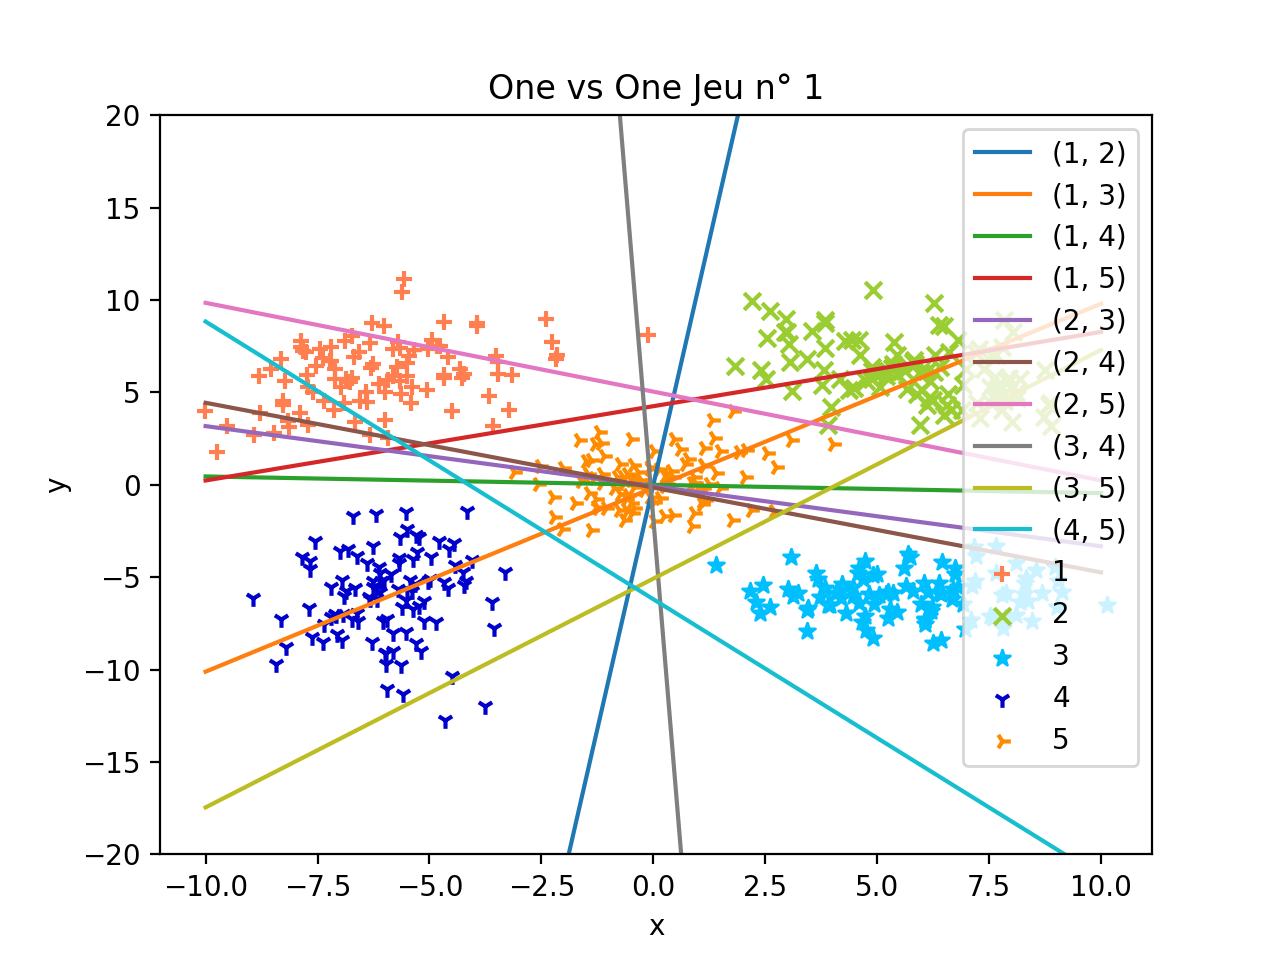

No handles with labels found to put in legend.


In [11]:
ListHyper1,c1=separation_lineaire_OneOne(df,a0,1)

### Evaluation des performances du modèle pour le jeu n°1

In [12]:
for i in dft.index:
    pointX=np.zeros((3,1))
    pointX[0,0]=dft['x'][i]
    pointX[1,0]=dft['y'][i]
    pointX[2,0]=1
    comb=combinations(df.Classe.unique(), 2)
    dft['ClassifOO'][i]=ClassificationOneOne(pointX,ListHyper1,comb)

In [13]:
MatriceConfusion(dft)

array([[ 99.,   0.,   0.,   0.,   1.],
       [  0.,  99.,   0.,   0.,   0.],
       [  0.,   0.,  99.,   1.,   0.],
       [  0.,   0.,   0., 100.,   0.],
       [  0.,   0.,   0.,   0.,  99.]])

In [14]:
tauxClassif(dft)

99.2

### J'ai obtenu un taux de classification de 99,2% pour le jeu n°1, c'était prévisible vu que le jeu de données est linéairement séparable.

## Adaptation de l'algorithme de séparation linéaire / test sur Jeu 2 & Jeu 3

In [8]:
# Cette fonction pour un jeu de données df trace les hyperplans optimaux selon la méthode One vs One et ayant comme paramètre a0
def separation_lineaire_OneOne_A(df,a0,i):
    List_Hyper=[]
    comb=combinations(df.Classe.unique(), 2)
    for c1 in comb:
            h = hyperplanA(df,c1[0],c1[1],a0)
            x = np.linspace(-10,10,10)
            y=(h[0]*x+h[2])*(-1/h[1])
            plt.ylim((-20,20))
            plt.figure(i)
            plt.legend()
            plt.plot(x,y, label="{}".format(c1))
            plt.show()
            List_Hyper.append(h)

 
    markers = {1: '+', 2: 'x', 3: '*', 4: '1', 5: '4'}
    colors = {1: 'coral', 2: 'yellowgreen', 3: 'deepskyblue', 4: 'mediumblue', 5: 'darkorange'}
    plt.figure(i)
    for kind in markers:
        d = df[df.Classe==kind]
        plt.scatter(d.x, d.y, 
                    c = colors[kind],
                    marker = markers[kind],label=kind)
    plt.title("One vs One Jeu n° {}".format(i))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    fig = plt.figure(1, figsize=(50, 60)) 
    plt.show()
    return List_Hyper, comb



In [9]:
# Cette fonction cherche l'hyperplan optimal entre classe1 et classe 2 pour un jeu de données df et ayant comme paramétre a0
# Il s'agira de stocker pour chaque hyperplan obtenu, son taux de classification et
# en final retourner l'hyperplan ayant un taux de classification maximal
def hyperplanA(df,classe1,classe2,a0):
    itermax=1000
    a0ancien=a0
    hyperA0=[]
    tauxHyper=[]
    dfa=df[(df.Classe==classe1) | (df.Classe==classe2)]
    dfa = dfa.reset_index()
    del dfa['index']
    dfa['c']=1
    dfa.loc[dfa.Classe == classe2,'c']=-1
    dfa.loc[dfa.Classe == classe2,'x']=dfa.loc[dfa.Classe == classe2,'x']*-1
    dfa.loc[dfa.Classe == classe2,'y']=dfa.loc[dfa.Classe == classe2,'y']*-1
    
    for iter in range(itermax):
        a0ancien=a0
        for k in dfa.index:
            result=np.dot(a0.transpose(),dfa.iloc[k,1:4])
            
            if result<=0:
                a0=a0+dfa.iloc[k,1:4]
        hyperA0.append(a0)
        tauxHyper.append(tauxClassificationOneOne(dfa,a0,classe1,classe2))

        if iter!=0:
            if (a0==a0ancien).all():
                break
    optimal_Hyper=max(tauxHyper)
    res=hyperA0[tauxHyper.index(optimal_Hyper)]
    return res 

In [11]:
# Cette fonction permet de donner le taux de classification d'un hperplan qui sépare deux classes c1 et c2 pour un jeu de données df
def tauxClassificationOneOne(df,hyperPlan,c1,c2):    
    
    #dfn=df.loc[(df.Classe==c1) | (df.Classe==c2)]
    #dfn.insert(0,"index0",range(len(dfn)))
    #dfn.set_index("index0")
    #print(df)
    #print(df.index)
    for k in df.index:
        pointX=np.zeros((3,1))
        #print(k)
        #print(df['x'][k])
        pointX[0,0]=df['x'][k]
        pointX[1,0]=df['y'][k]
        pointX[2,0]=1
        classeP=ClassificationOneOne_HyperC(pointX,hyperPlan,c1,c2)
        #print(classeP)
        #df.at[k, 'classeP'] = classeP
        df.loc[k,'classeP'] = classeP 
    
    
    
    taux=(df.loc[df.classeP==df.Classe]).shape[0]*100/df.shape[0]
    return taux

### Apprentissage du Jeu n°2 avec l'algorithme adapté

<IPython.core.display.Javascript object>


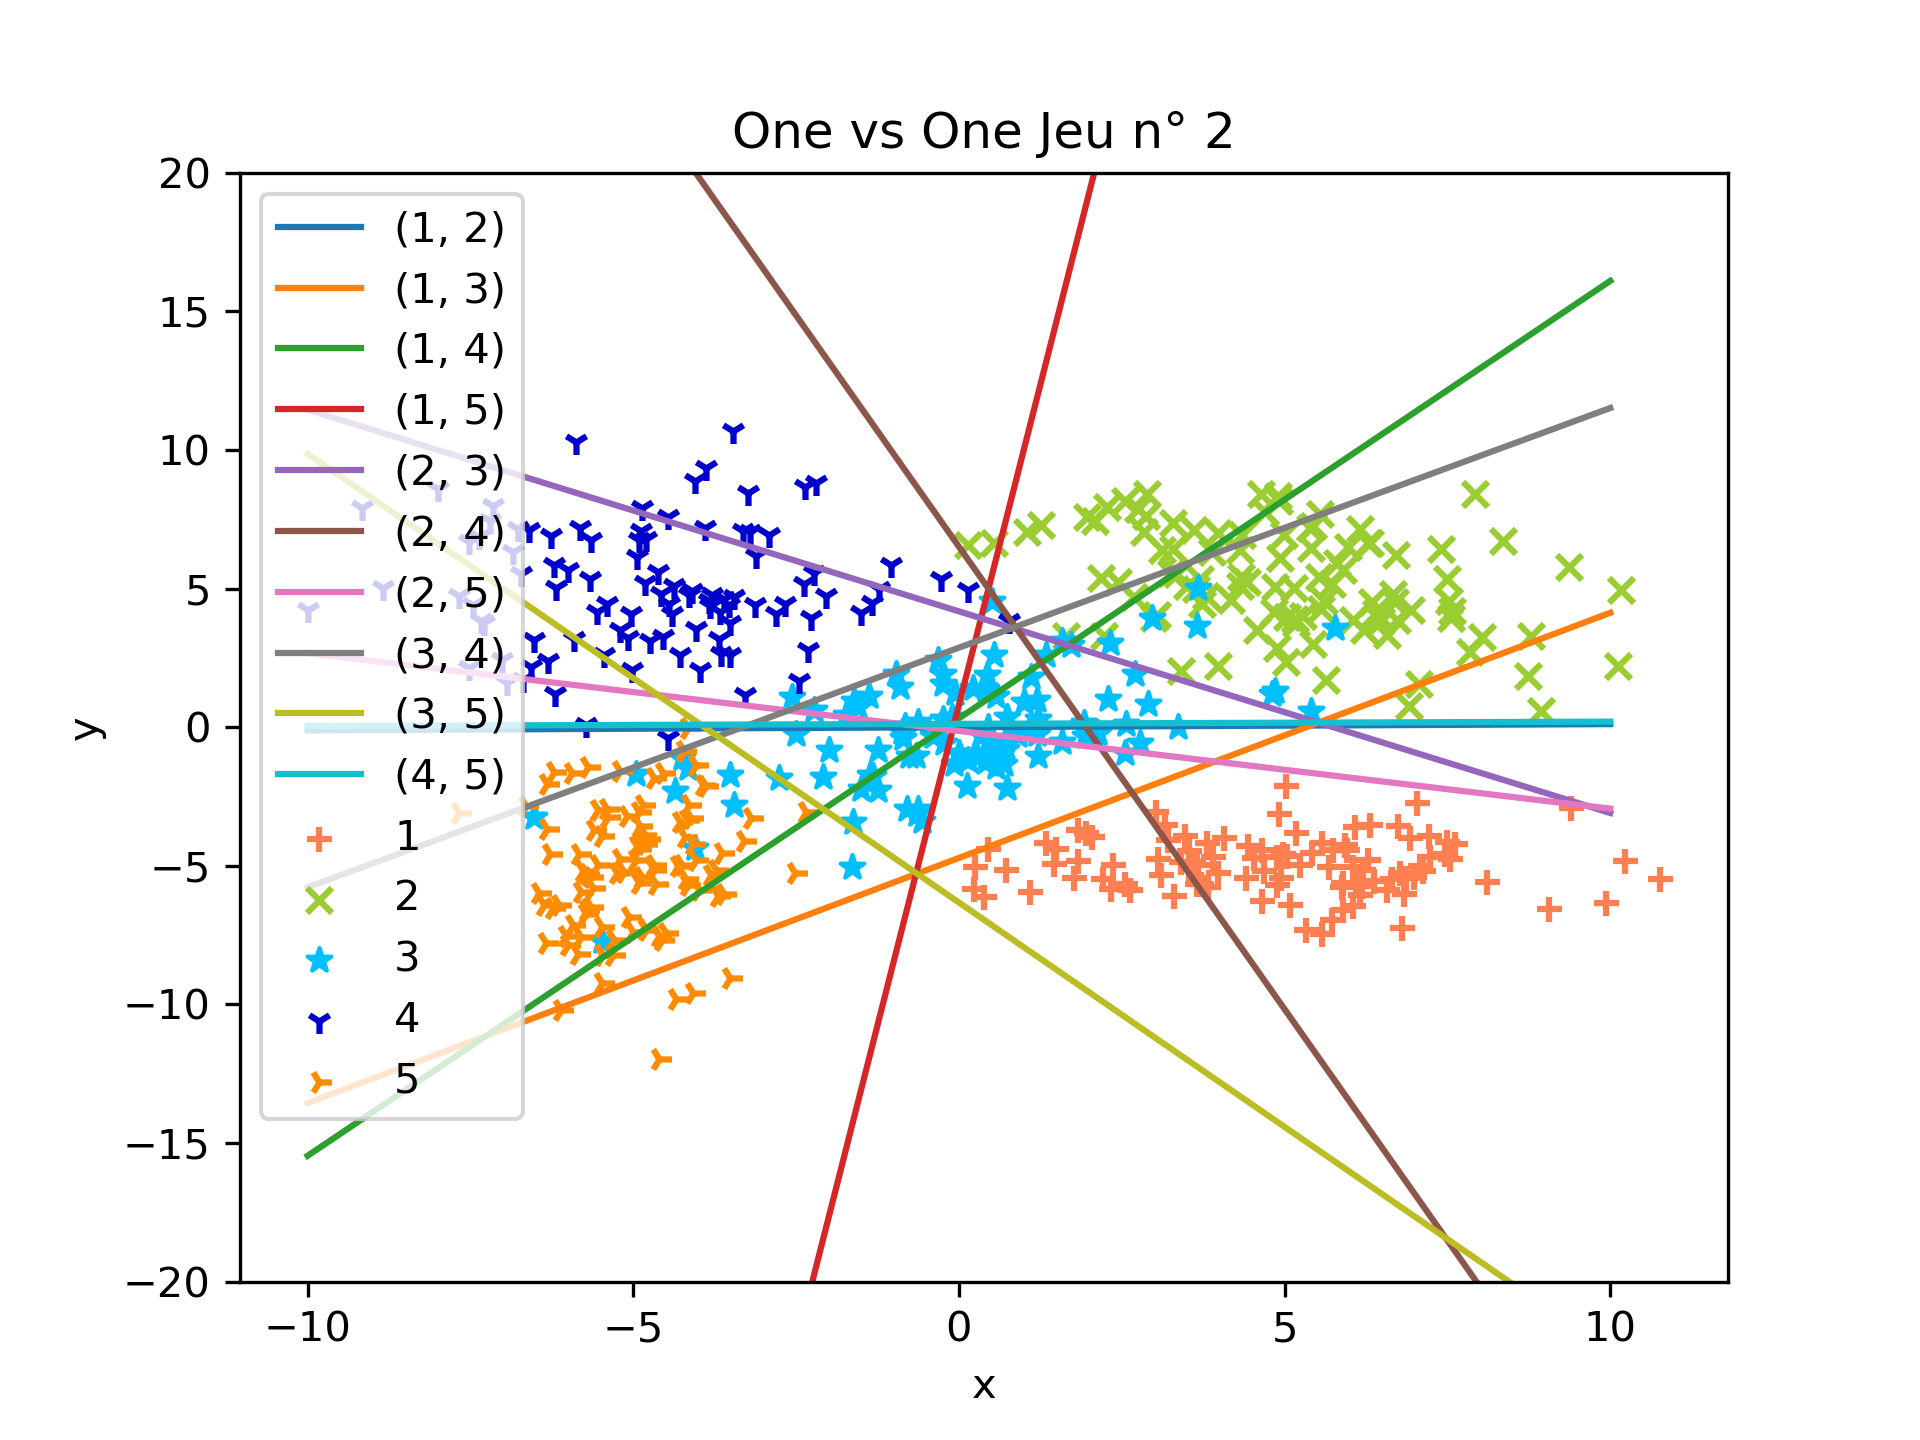

No handles with labels found to put in legend.


In [33]:
ListHyper2,c2=separation_lineaire_OneOne_A(df2,a0,2)

### Evaluation des performances du modèle pour le jeu n°2

In [138]:
for i in dft2.index:
    pointX=np.zeros((3,1))
    pointX[0,0]=dft2['x'][i]
    pointX[1,0]=dft2['y'][i]
    pointX[2,0]=1
    comb=combinations(df.Classe.unique(), 2)
    dft2['ClassifOO'][i]=ClassificationOneOne(pointX,ListHyper2,comb)

1
1
1
1
3
4
5
3
3
5
[4, 0, 3, 1, 2]
1
1
1
1
3
4
5
3
3
5
[4, 0, 3, 1, 2]
1
1
1
1
3
2
5
3
3
5
[4, 1, 3, 0, 2]
1
1
1
1
3
2
5
3
3
5
[4, 1, 3, 0, 2]
1
1
1
1
3
2
5
3
3
5
[4, 1, 3, 0, 2]
1
1
1
1
3
2
5
3
3
5
[4, 1, 3, 0, 2]
1
1
1
1
3
2
5
3
3
5
[4, 1, 3, 0, 2]
1
1
1
1
3
2
5
3
3
5
[4, 1, 3, 0, 2]
1
1
1
1
3
2
5
3
3
5
[4, 1, 3, 0, 2]
1
1
1
1
3
2
5
3
3
5
[4, 1, 3, 0, 2]
1
1
1
1
3
2
5
3
3
5
[4, 1, 3, 0, 2]
1
1
1
1
3
2
5
3
3
5
[4, 1, 3, 0, 2]
1
1
1
1
3
2
5
3
3
5
[4, 1, 3, 0, 2]
1
1
1
1
3
2
5
3
3
5
[4, 1, 3, 0, 2]
1
1
1
1
3
2
5
3
3
5
[4, 1, 3, 0, 2]
1
1
1
1
3
2
5
3
3
5
[4, 1, 3, 0, 2]
1
1
1
1
3
2
5
3
3
5
[4, 1, 3, 0, 2]
1
1
1
1
2
2
2
3
3
5
[4, 3, 2, 0, 1]
1
1
1
1
3
2
5
3
3
5
[4, 1, 3, 0, 2]
1
1
1
1
3
4
5
3
3
5
[4, 0, 3, 1, 2]
1
1
1
1
3
4
5
3
3
5
[4, 0, 3, 1, 2]
1
1
1
1
3
2
5
3
3
5
[4, 1, 3, 0, 2]
1
1
1
1
3
2
5
3
3
5
[4, 1, 3, 0, 2]
1
1
1
1
3
2
5
3
3
5
[4, 1, 3, 0, 2]
1
1
1
1
3
2
5
3
3
5
[4, 1, 3, 0, 2]
1
1
1
1
3
4
5
3
3
5
[4, 0, 3, 1, 2]
1
1
1
1
3
2
5
3
3
5
[4, 1, 3, 0, 2]
1
1
1
1
3
2
5
3
3
5
[4, 1, 3

In [144]:
MatriceConfusion(dft2)

array([[100.,   0.,   0.,   0.,   0.],
       [  2.,  97.,   1.,   0.,   0.],
       [  0.,   6.,  80.,   3.,  11.],
       [  0.,   0.,   3.,  97.,   0.],
       [  0.,   0.,   1.,   0.,  99.]])

In [142]:
tauxClassif(dft2)

94.6

### Même si le jeu est difficilement linéairement séparable, j'ai adapté l'algorithme pour avoir les hyperplans optimaux. De ce fait, j'ai obtenu un taux de classification de 94,6% pour le jeu n°2.

### Apprentissage du Jeu n°3 avec l'algorithme adapté

<IPython.core.display.Javascript object>


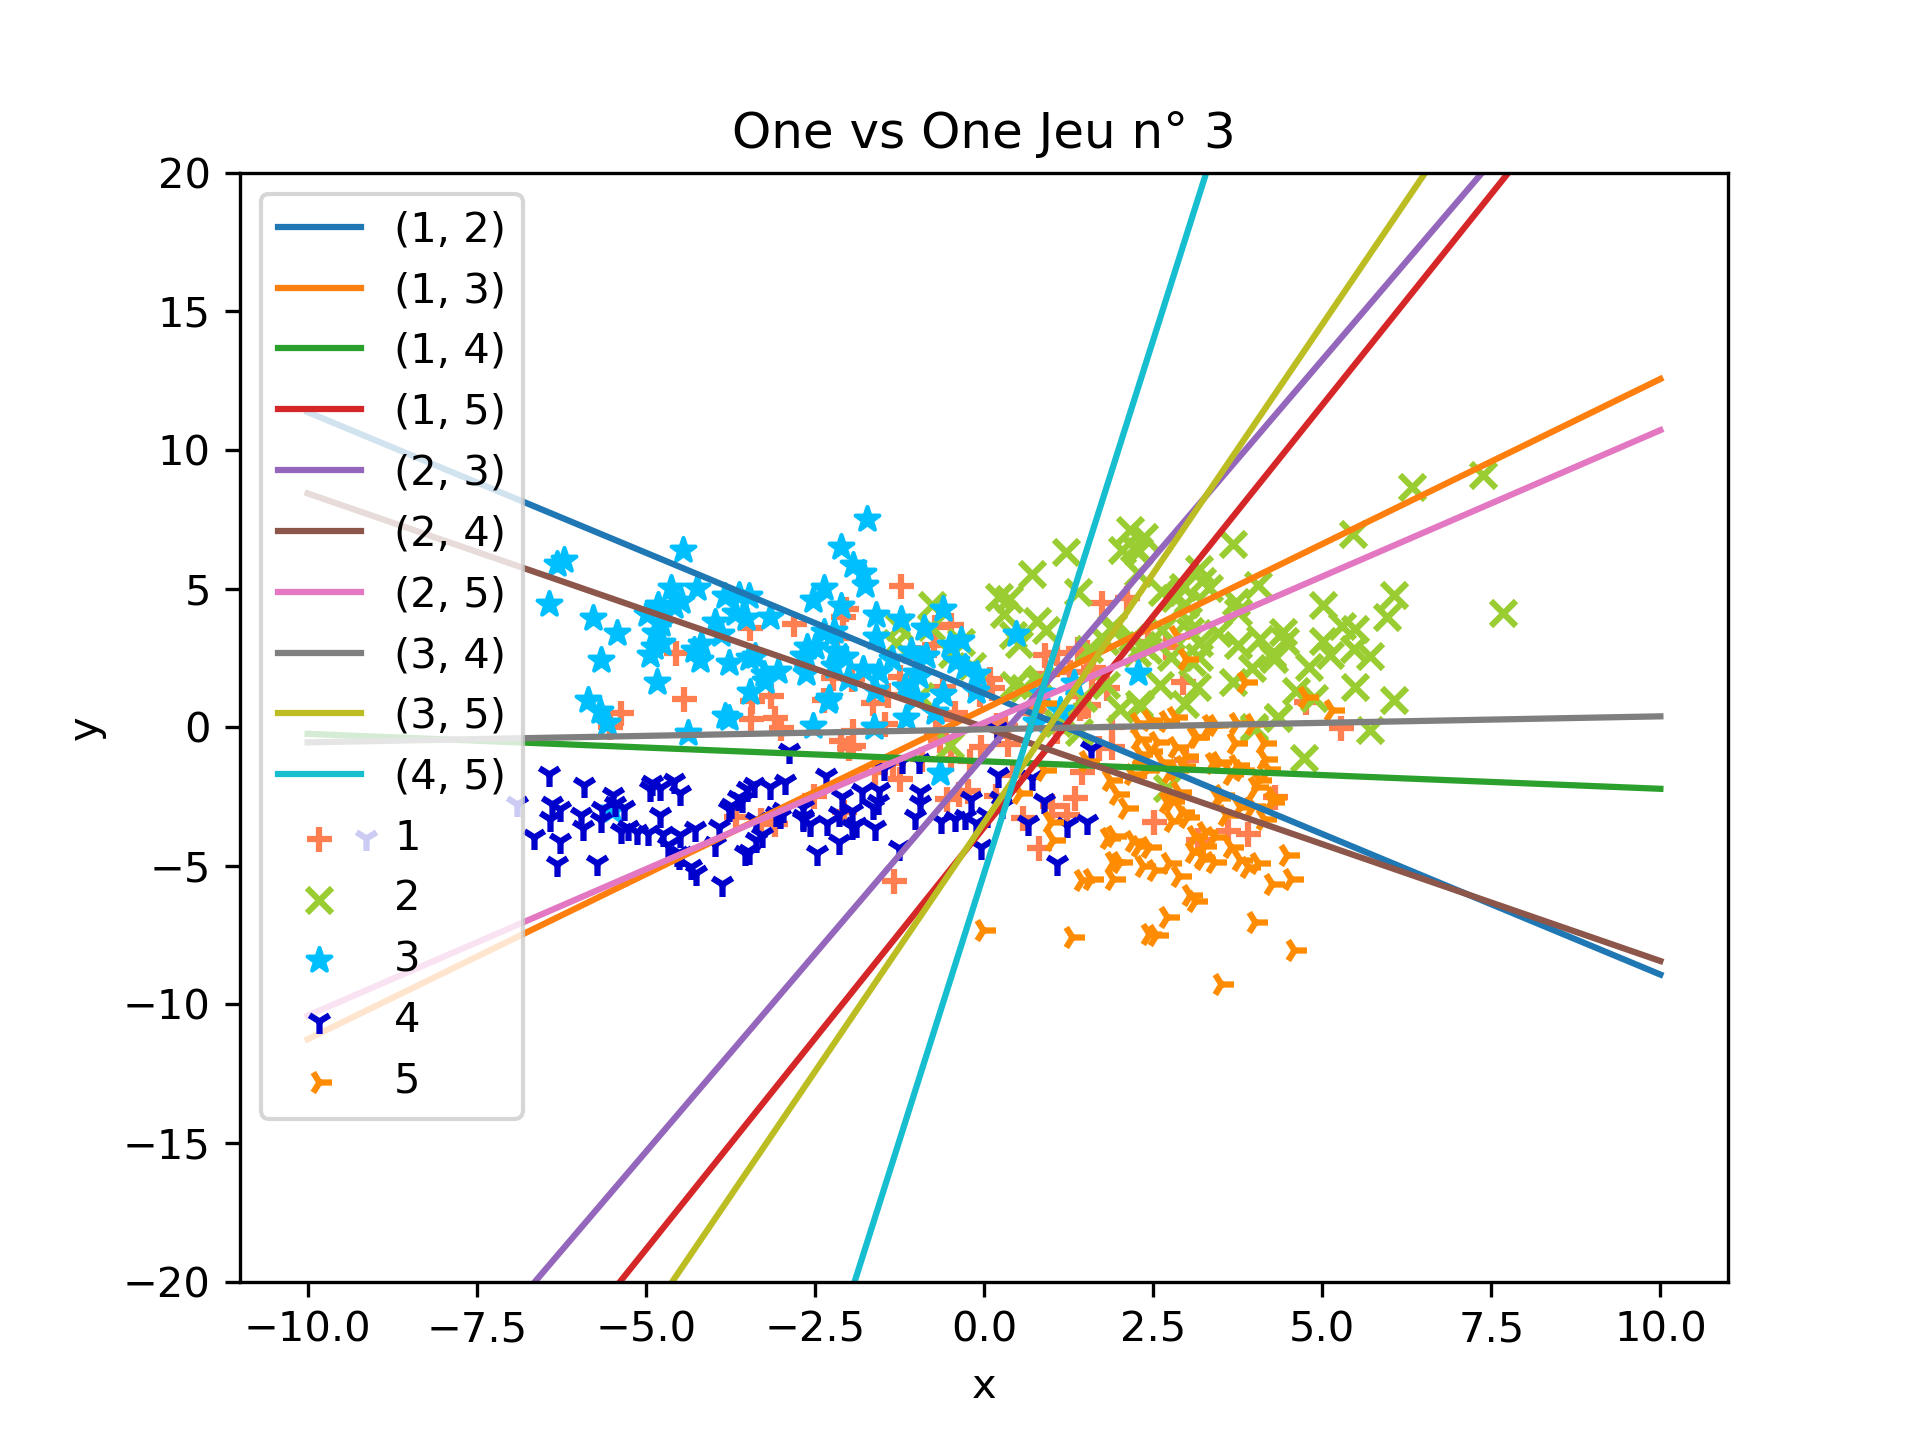

No handles with labels found to put in legend.


In [34]:
ListHyper3,c3=separation_lineaire_OneOne_A(df3,a0,3)

### Evaluation des performances du modèle pour le jeu n°3

In [139]:
for i in dft3.index:
    pointX=np.zeros((3,1))
    pointX[0,0]=dft3['x'][i]
    pointX[1,0]=dft3['y'][i]
    pointX[2,0]=1
    comb=combinations(df.Classe.unique(), 2)
    dft3['ClassifOO'][i]=ClassificationOneOne(pointX,ListHyper3,comb)

1
3
1
1
3
4
2
4
3
4
[3, 1, 3, 3, 0]
1
1
1
5
2
2
5
4
5
5
[3, 2, 0, 1, 4]
2
3
1
1
3
2
2
3
3
4
[2, 3, 4, 1, 0]
2
3
1
1
3
2
2
3
3
4
[2, 3, 4, 1, 0]
2
1
1
5
2
2
5
4
5
5
[2, 3, 0, 1, 4]
1
1
1
1
3
2
5
3
3
4
[4, 1, 3, 1, 1]
1
1
1
1
3
4
2
4
3
4
[4, 1, 2, 3, 0]
2
3
1
1
3
2
2
3
3
4
[2, 3, 4, 1, 0]
2
3
1
1
3
2
2
3
3
4
[2, 3, 4, 1, 0]
2
1
4
5
2
2
5
4
5
5
[1, 3, 0, 2, 4]
1
1
4
1
2
4
5
4
3
4
[3, 1, 1, 4, 1]
1
3
4
1
3
4
2
4
3
4
[2, 1, 3, 4, 0]
1
1
4
1
2
4
5
4
3
4
[3, 1, 1, 4, 1]
2
1
1
1
2
2
2
3
3
5
[3, 4, 2, 0, 1]
2
1
1
5
2
2
5
3
5
5
[2, 3, 1, 0, 4]
1
3
1
1
3
2
2
3
3
4
[3, 2, 4, 1, 0]
1
3
4
1
3
4
2
4
3
4
[2, 1, 3, 4, 0]
1
3
1
1
3
2
2
3
3
4
[3, 2, 4, 1, 0]
1
1
4
5
2
4
5
4
5
5
[2, 1, 0, 3, 4]
1
1
4
5
2
4
5
4
5
5
[2, 1, 0, 3, 4]
1
1
4
1
2
4
5
4
3
4
[3, 1, 1, 4, 1]
2
3
1
1
3
2
2
3
3
4
[2, 3, 4, 1, 0]
2
1
4
5
2
2
5
4
5
5
[1, 3, 0, 2, 4]
1
3
1
1
3
4
2
3
3
4
[3, 1, 4, 2, 0]
2
3
1
1
3
2
2
3
3
4
[2, 3, 4, 1, 0]
1
1
1
1
3
2
5
3
3
4
[4, 1, 3, 1, 1]
2
1
1
5
2
2
5
3
5
5
[2, 3, 1, 0, 4]
2
1
1
5
2
2
5
3
5
5
[2, 3, 1

In [145]:
MatriceConfusion(dft3)

array([[ 5.,  4., 34., 18., 30.],
       [ 3., 29., 23.,  0., 43.],
       [ 3.,  0., 90.,  2.,  3.],
       [ 1.,  0., 15., 69.,  4.],
       [ 1.,  0.,  0.,  0., 98.]])

In [143]:
tauxClassif(dft3)

58.2

### Vu que le jeu de données n°3 est linéairement non séparable , j'ai obtenu un taux de classification de 58,2% pour le jeu n°3

#  Cas One vs All

In [5]:
# retrait de la classe 5 des jeux de données
df=df[df.Classe!=5]
df2=df2[df2.Classe!=5]
df3=df3[df3.Classe!=5]
dft=dft[dft.Classe!=5]
dft2=dft2[dft2.Classe!=5]
dft3=dft3[dft3.Classe!=5]

In [6]:
# Cette fonction pour un jeu de données df trace les différents hyperplans selon la méthode One vs All et ayant comme paramètre a0
def separation_lineaire_OneAll(df,a0,i):
    List_Hyper_c=[]
    List_Hyper=[]
    for c1 in df.Classe.unique():
        List_Hyper.append(hyperplan_OneAll(df,c1,a0))
    cl=0
    plt.figure(i)
    for h in List_Hyper:
        cl=cl+1
        List_Hyper_c.append((cl,h))
        #print("pour :{}".format(c1))
        #print(h)
        x = np.linspace(-10,10,10)
        y=(h[0]*x+h[2])*(-1/h[1])
        plt.ylim((-10,10))
        plt.plot(x,y,label=cl)
        plt.show()
    
    markers = {1: '+', 2: 'x', 3: '*', 4: '1'}
    colors = {1: 'coral', 2: 'yellowgreen', 3: 'deepskyblue', 4: 'mediumblue'}
    plt.figure(i)
    for kind in markers:
        d = df[df.Classe==kind]
        plt.scatter(d.x, d.y, 
                    c = colors[kind],
                    marker = markers[kind],label=kind)
    plt.title("One vs All Jeu n°{}".format(i-3))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    #plt.yticks(np.arange(-20,20,0.5))
    plt.show()
    return List_Hyper_c

In [7]:
# Cette fonction pour un jeu de données df trace les hyperplans optimaux selon la méthode One vs All et ayant comme paramètre a0
def separation_lineaire_OneAll_A(df,a0,i,j):
    List_Hyper_c=[]
    List_Hyper=[]
    for c1 in df.Classe.unique():
        List_Hyper.append(hyperplan_OneAll_A(df,c1,a0))
    cl=0
    plt.figure(i)
    for h in List_Hyper:
        cl=cl+1
        List_Hyper_c.append((cl,h))
        #print("pour :{}".format(c1))
        #print(h)
        x = np.linspace(-10,10,10)
        y=(h[0]*x+h[2])*(-1/h[1])
        plt.ylim((-10,10))
        plt.plot(x,y,label=cl)
        plt.show()
    
    markers = {1: '+', 2: 'x', 3: '*', 4: '1'}
    colors = {1: 'coral', 2: 'yellowgreen', 3: 'deepskyblue', 4: 'mediumblue'}
    plt.figure(i)
    for kind in markers:
        d = df[df.Classe==kind]
        plt.scatter(d.x, d.y, 
                    c = colors[kind],
                    marker = markers[kind],label=kind)
    plt.title("One vs All Jeu n°{}".format(j))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    #plt.yticks(np.arange(-20,20,0.5))
    plt.show()
    return List_Hyper_c

In [8]:
# Cette fonction cherche l'hyperplan entre classe1 par rapport aux autres classes pour un jeu de données df et ayant comme paramétre a0
def hyperplan_OneAll(df,classe1,a0):
    itermax=5000
    a0ancien=a0
    #print(df)
    dfc=df.copy()    
    mask1 = dfc.Classe == classe1
    mask2 = dfc.Classe != classe1
    dfc.loc[mask1,'c']=1
    dfc.loc[mask2,'c']=-1
    dfc.loc[mask2,'x']=dfc.loc[mask2,'x']*-1
    dfc.loc[mask2,'y']=dfc.loc[mask2,'y']*-1
    #print(dfc)
    for iter in range(itermax):
        a0ancien=a0

        for k in dfc.index:
            #print(a0)
            #print("a0 Trans:{}".format(a0.transpose()))
            #print("y :{}".format(dfc.iloc[k,1:5]))
            result=np.dot(a0.transpose(),dfc.iloc[k,1:5])
            #a0ancien=a0
            #print(result)
            if result<=0:
                a0=a0+dfc.iloc[k,1:5]

        if iter!=0:
            #print(a0)
            #print(a0ancien)
            if (a0==a0ancien).all():
                break
    return a0

In [9]:
# Cette fonction cherche l'hyperplan optimal entre classe1 et les autres classes pour un jeu de données df et ayant comme paramétre a0
# Il s'agira de stocker pour chaque hyperplan obtenu, son taux de classification et
# en final retourner l'hyperplan ayant un taux de classification maximal
def hyperplan_OneAll_A(df,classe1,a0):
    itermax=1000
    a0ancien=a0
    hyperA0=[]
    tauxHyper=[]
    #print(df)
    dfc=df.copy()    
    mask1 = dfc.Classe == classe1
    mask2 = dfc.Classe != classe1
    dfc.loc[mask1,'c']=1
    dfc.loc[mask2,'c']=-1
    dfc.loc[mask2,'x']=dfc.loc[mask2,'x']*-1
    dfc.loc[mask2,'y']=dfc.loc[mask2,'y']*-1
    #print(dfc)
    for iter in range(itermax):
        a0ancien=a0

        for k in dfc.index:
            #print(a0)
            #print("a0 Trans:{}".format(a0.transpose()))
            #print("y :{}".format(dfc.iloc[k,1:5]))
            result=np.dot(a0.transpose(),dfc.iloc[k,1:5])
            #a0ancien=a0
            #print(result)
            if result<=0:
                a0=a0+dfc.iloc[k,1:5]

        hyperA0.append(a0)
        tauxHyper.append(tauxClassificationOneAll(a0,df,classe1))
        if iter!=0:
            #print(a0)
            #print(a0ancien)
            if (a0==a0ancien).all():
                break
    #print(tauxHyper)
    #print(hyperA0)
    optimal_Hyper=max(tauxHyper)
    res=hyperA0[tauxHyper.index(optimal_Hyper)]
    return res 

In [10]:
# Taux de classification d'un jeu de données de test
def tauxClassif_OA(dft):
    return (dft.loc[dft.ClassifOA == dft.Classe]).shape[0]*100/dft.shape[0]

In [11]:
#Matrice de confusion 
def MatriceConfusion_OA(dft):
    MatConf=np.zeros((4,4))
    MatConf[0,0]=(dft.loc[(dft.ClassifOA == dft.Classe) & (dft.Classe ==1)]).shape[0]
    MatConf[0,1]=(dft.loc[(dft.ClassifOA == 2) & (dft.Classe ==1)]).shape[0]
    MatConf[0,2]=(dft.loc[(dft.ClassifOA == 3) & (dft.Classe ==1)]).shape[0]
    MatConf[0,3]=(dft.loc[(dft.ClassifOA == 4) & (dft.Classe ==1)]).shape[0]
    MatConf[1,1]=(dft.loc[(dft.ClassifOA == dft.Classe) & (dft.Classe ==2)]).shape[0]
    MatConf[1,0]=(dft.loc[(dft.ClassifOA == 1) & (dft.Classe ==2)]).shape[0]
    MatConf[1,2]=(dft.loc[(dft.ClassifOA == 3) & (dft.Classe ==2)]).shape[0]
    MatConf[1,3]=(dft.loc[(dft.ClassifOA == 4) & (dft.Classe ==2)]).shape[0]
    MatConf[2,2]=(dft.loc[(dft.ClassifOA == dft.Classe) & (dft.Classe ==3)]).shape[0]
    MatConf[2,1]=(dft.loc[(dft.ClassifOA == 2) & (dft.Classe ==3)]).shape[0]
    MatConf[2,0]=(dft.loc[(dft.ClassifOA == 1) & (dft.Classe ==3)]).shape[0]
    MatConf[2,3]=(dft.loc[(dft.ClassifOA == 4) & (dft.Classe ==3)]).shape[0]
    MatConf[3,3]=(dft.loc[(dft.ClassifOA == dft.Classe) & (dft.Classe ==4)]).shape[0]
    MatConf[3,1]=(dft.loc[(dft.ClassifOA == 2) & (dft.Classe ==4)]).shape[0]
    MatConf[3,2]=(dft.loc[(dft.ClassifOA == 3) & (dft.Classe ==4)]).shape[0]
    MatConf[3,0]=(dft.loc[(dft.ClassifOA == 1) & (dft.Classe ==4)]).shape[0]
    return MatConf


In [12]:
#Classification selon la méthode One vs All pour un point par rapport aux hyperplans
def ClassificationOneAll(pointX,hyperPlans):
    Classes=[]
    classe=""
    for h in hyperPlans:
        if h[1].T@pointX>0:
            Classes.append(str(h[0]))
        else :
            classe=""
            for i in range(1,5,1):
                if i!=h[0]:
                    classe=classe+str(i)+"."
            
            Classes.append(classe)
            
    
    print(Classes)
    return DefinirClasse(Classes)

In [13]:
#Classification selon la méthode One vs All pour un point par rapport à l'hyperplan d'une classe donnée en paramétre
def ClassificationOneAll_HyperC(pointX,h,c):
    Classes=[]
    classe=""
    if h.T@pointX>0:
            Classes.append(str(c))
    else :
        classe=""
        for i in range(1,5,1):
            if i!=c:
                classe=classe+str(i)+"."
            
        Classes.append(classe)
            
    
    
    return Classes

In [14]:
# Cette fonction permet de retourner la classe finale ou rien dans le cas de rejet de  à partir des classes proposées
def DefinirClasse(A):
    Classes=[0,0,0,0]
    classes=[1,2,3,4]
    classefin=[]
    for c in classes:
        for i in A:
            if i.find(str(c))>=0 :
                Classes[c-1]=Classes[c-1]+1
    maxi=max(Classes)
    if Classes.count(maxi)==1: 
        res=Classes.index(maxi)+1
    else : 
        res=None
    
    return res       

In [15]:
# Taux de classification d'un hyperplan a0 par rapport à une classe 1 d'un jeu de données de test dans le cas de One vs All
def tauxClassificationOneAll(a0,df,classe1):
    dfc=df.copy()
    classesS = dfc['Classe'].unique().astype(str)
    classes = dfc['Classe'].unique()
    taux=0
    i=0
    for k in dfc.index:
        pointX=np.zeros((3,1))
        #print(k)
        #print(df['x'][k])
        pointX[0,0]=dfc['x'][k]
        pointX[1,0]=dfc['y'][k]
        pointX[2,0]=1
        classeP=ClassificationOneAll_HyperC(pointX,a0,classe1)
        #print(classeP)
        #df.at[k, 'classeP'] = classeP
        dfc.loc[k,'classeP'] = classeP 
    #print(dfc)
    for c in classes:
        dfc1=dfc[dfc['Classe']==c]
        taux = taux + dfc1.loc[dfc1['classeP'].str.find(classesS[i])>=0].shape[0]
        i=i+1
    return taux*100/dfc.shape[0]

### Application pour le Jeu n°1

### Apprentissage

In [36]:
a0=np.array([0,0,0])

<IPython.core.display.Javascript object>


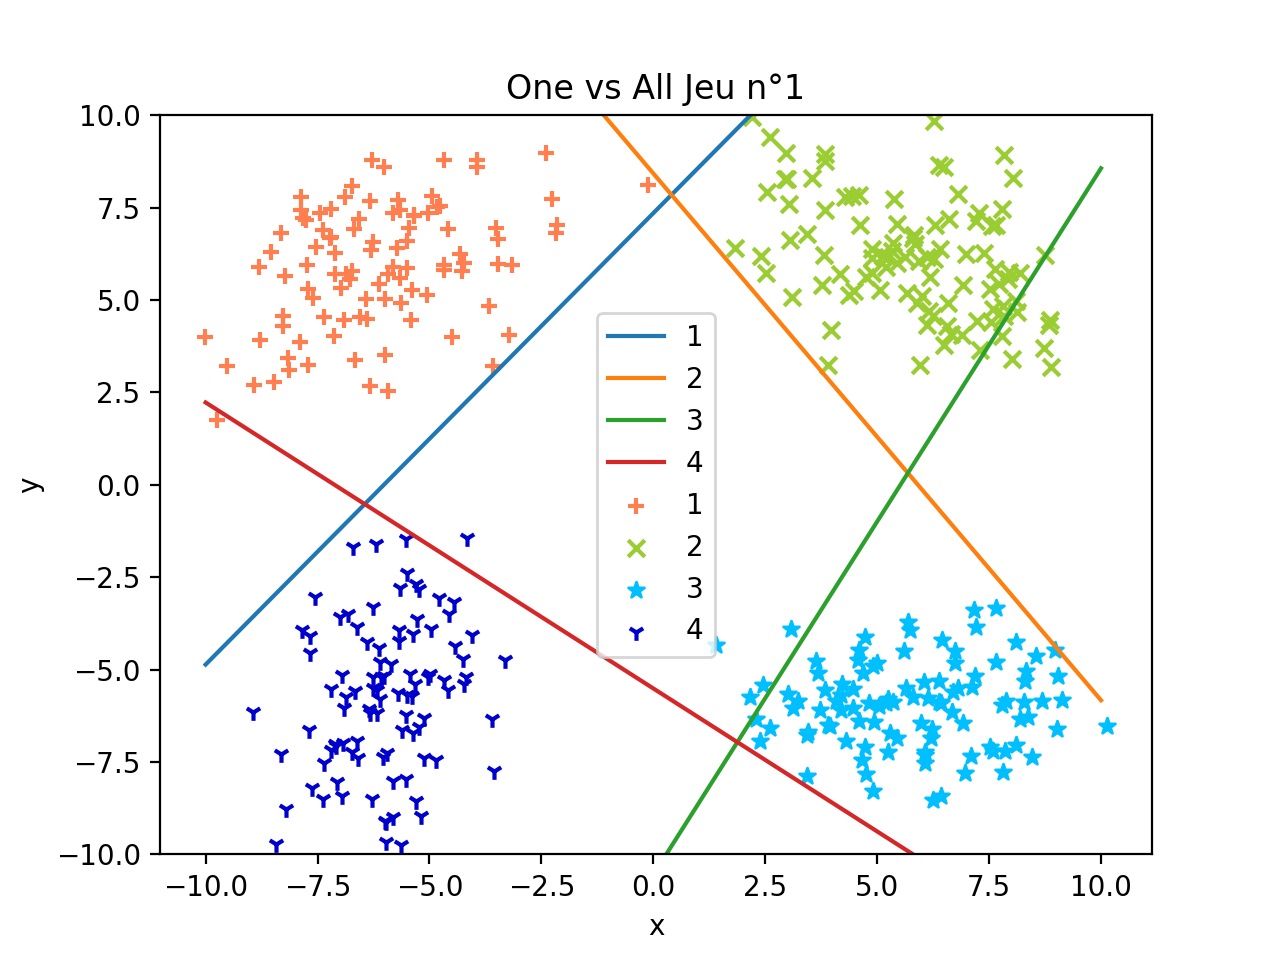

In [37]:
ListeHyper1_OA=separation_lineaire_OneAll(df,a0,4)

In [38]:
ListeHyper1_OA

[(1,
  x   -13.294492
  y    10.884927
  c   -80.000000
  dtype: float64),
 (2,
  x    12.350892
  y     8.665190
  c   -73.000000
  dtype: float64),
 (3,
  x     28.439710
  y    -14.878853
  c   -157.000000
  dtype: float64),
 (4,
  x    -31.037568
  y    -40.111797
  c   -221.000000
  dtype: float64)]

### Evaluation des performances du modèle pour le jeu n°1

In [39]:
for i in dft.index:
    pointX=np.zeros((3,1))
    pointX[0,0]=dft['x'][i]
    pointX[1,0]=dft['y'][i]
    pointX[2,0]=1
    dft['ClassifOA'][i]=ClassificationOneAll(pointX,ListeHyper1_OA)

['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['2.3.4.', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.

In [40]:
MatriceConfusion_OA(dft)

array([[98.,  0.,  0.,  0.],
       [ 0., 95.,  0.,  0.],
       [ 0.,  0., 90.,  1.],
       [ 0.,  0.,  0., 99.]])

In [41]:
tauxClassif_OA(dft)

95.5

### Application pour le Jeu n°1 avec l'algorithme adapté qui recherche les hyperplans optimaux

### Apprentissage

<IPython.core.display.Javascript object>


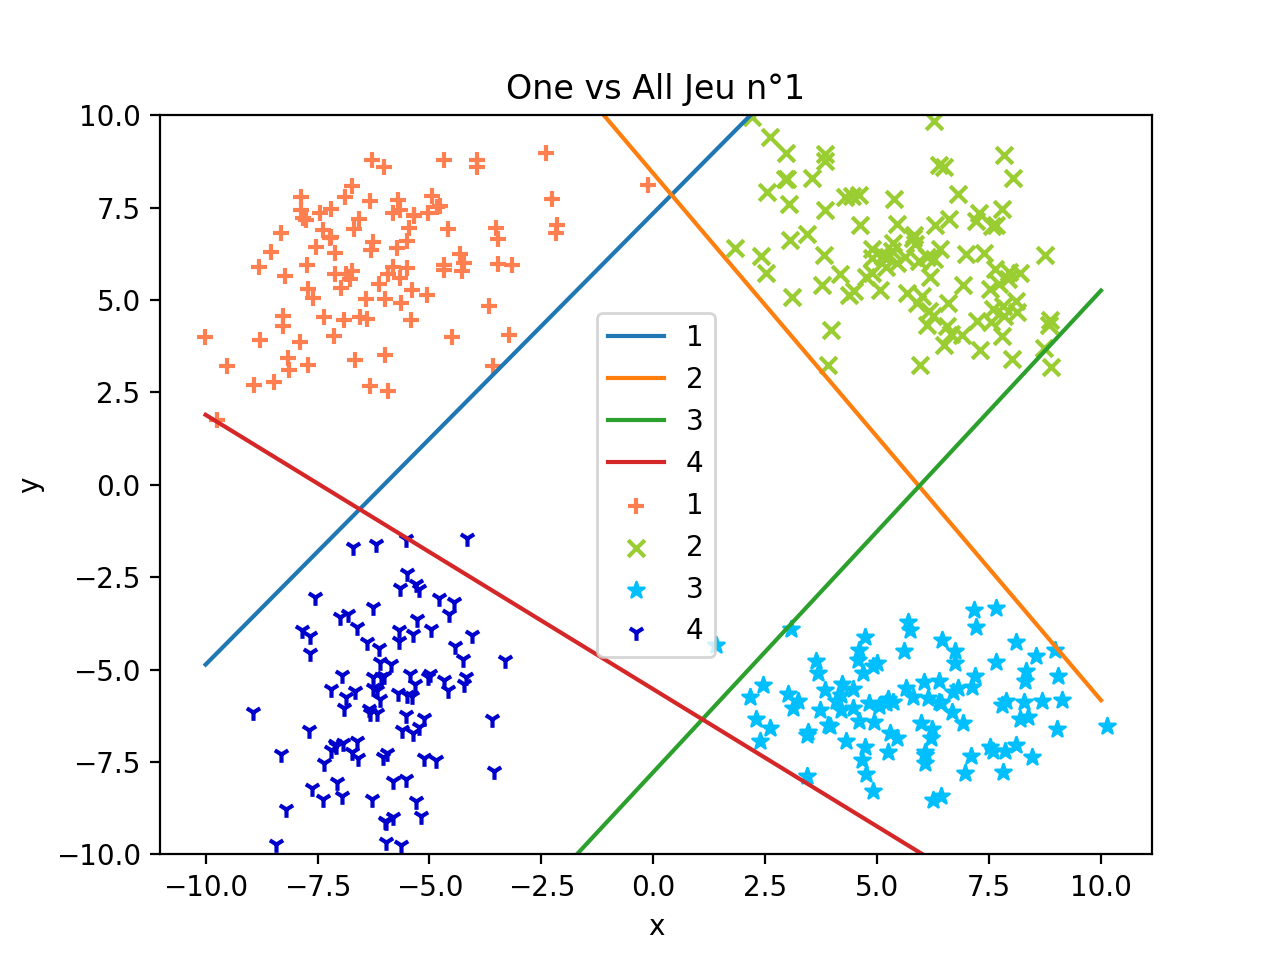

In [32]:
ListeHyper1_OA_A=separation_lineaire_OneAll_A(df,a0,5,1)

### Evaluation des performances du modèle pour le jeu n°1 avec l'algorithme adapté

In [33]:
for i in dft.index:
    pointX=np.zeros((3,1))
    pointX[0,0]=dft['x'][i]
    pointX[1,0]=dft['y'][i]
    pointX[2,0]=1
    dft['ClassifOA'][i]=ClassificationOneAll(pointX,ListeHyper1_OA_A)

['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['2.3.4.', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.

In [34]:
MatriceConfusion_OA(dft)

array([[98.,  0.,  0.,  0.],
       [ 0., 96.,  0.,  0.],
       [ 0.,  0., 92.,  1.],
       [ 0.,  0.,  0., 99.]])

In [35]:
tauxClassif_OA(dft)

96.25

### l'algorithme adapté a pu améliorer les performances du modèle pour le jeu n°1

### Application pour le Jeu n°2

### Apprentissage

<IPython.core.display.Javascript object>


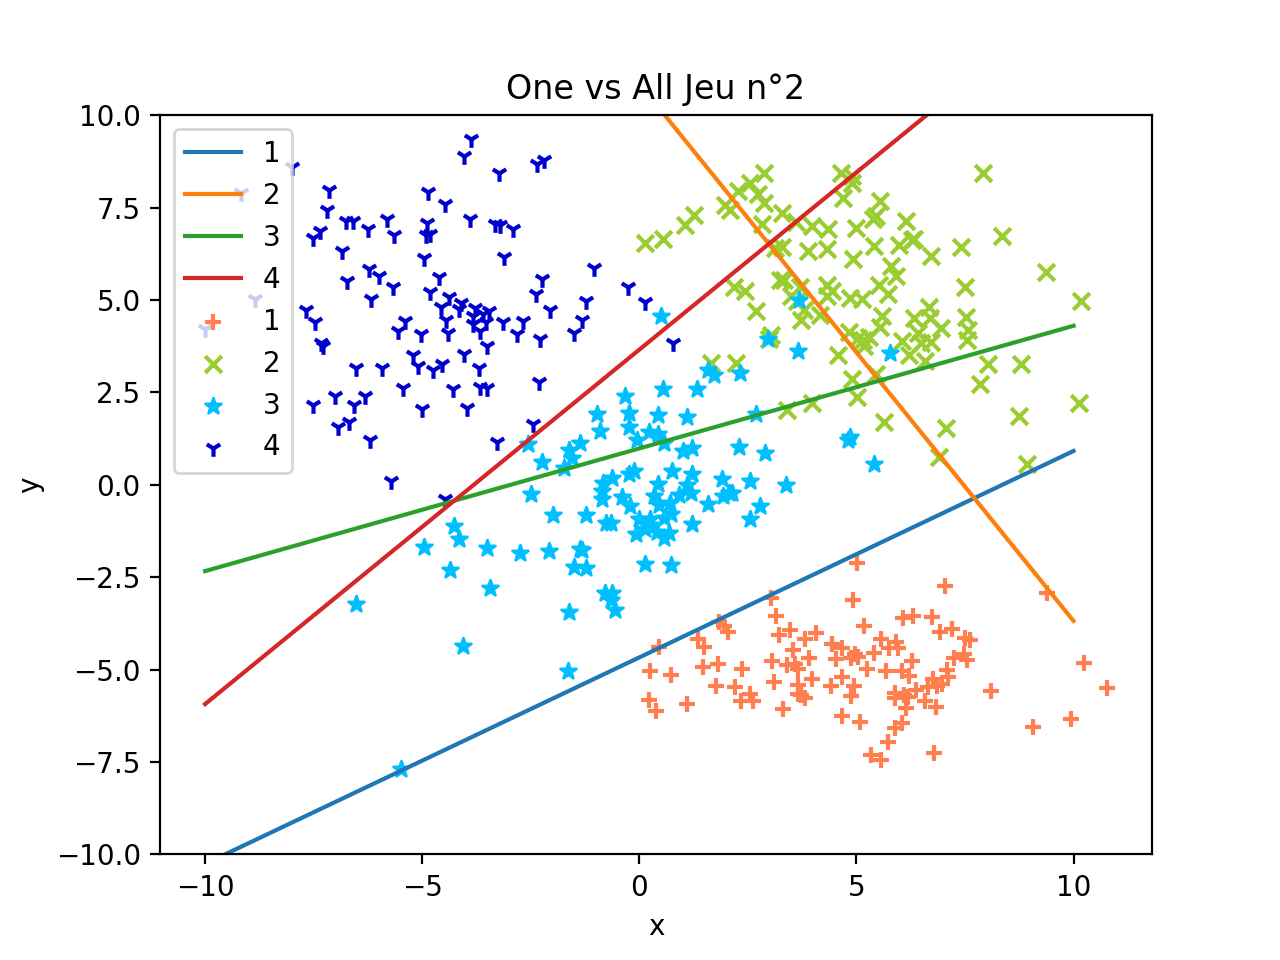

In [18]:
ListeHyper2_OA=separation_lineaire_OneAll_A(df2,a0,6,2)

### Evaluation des performances du modèle pour le jeu n°2

In [25]:
for i in dft2.index:
    pointX=np.zeros((3,1))
    pointX[0,0]=dft2['x'][i]
    pointX[1,0]=dft2['y'][i]
    pointX[2,0]=1
    dft2['ClassifOA'][i]=ClassificationOneAll(pointX,ListeHyper2_OA)

['1', '1.3.4.', '3', '1.2.3.']
['1', '1.3.4.', '3', '1.2.3.']
['1', '1.3.4.', '3', '1.2.3.']
['1', '1.3.4.', '3', '1.2.3.']
['1', '1.3.4.', '3', '1.2.3.']
['1', '1.3.4.', '3', '1.2.3.']
['1', '1.3.4.', '3', '1.2.3.']
['1', '1.3.4.', '3', '1.2.3.']
['1', '1.3.4.', '3', '1.2.3.']
['1', '1.3.4.', '3', '1.2.3.']
['1', '1.3.4.', '3', '1.2.3.']
['1', '1.3.4.', '3', '1.2.3.']
['1', '1.3.4.', '3', '1.2.3.']
['1', '1.3.4.', '3', '1.2.3.']
['1', '1.3.4.', '3', '1.2.3.']
['1', '1.3.4.', '3', '1.2.3.']
['1', '1.3.4.', '3', '1.2.3.']
['1', '2', '3', '1.2.3.']
['1', '1.3.4.', '3', '1.2.3.']
['1', '1.3.4.', '3', '1.2.3.']
['1', '1.3.4.', '3', '1.2.3.']
['1', '1.3.4.', '3', '1.2.3.']
['1', '1.3.4.', '3', '1.2.3.']
['1', '1.3.4.', '3', '1.2.3.']
['1', '1.3.4.', '3', '1.2.3.']
['1', '1.3.4.', '3', '1.2.3.']
['1', '1.3.4.', '3', '1.2.3.']
['1', '1.3.4.', '3', '1.2.3.']
['1', '1.3.4.', '3', '1.2.3.']
['1', '1.3.4.', '3', '1.2.3.']
['1', '1.3.4.', '3', '1.2.3.']
['1', '1.3.4.', '3', '1.2.3.']
['1', '1.3.4.

In [26]:
MatriceConfusion_OA(dft2)

array([[ 0.,  0.,  1.,  0.],
       [ 0., 47.,  4.,  5.],
       [ 0.,  1., 72.,  2.],
       [ 0.,  0.,  1., 97.]])

In [21]:
tauxClassif_OA(dft2)

54.0

### Application pour le Jeu n°3

### Apprentissage

<IPython.core.display.Javascript object>


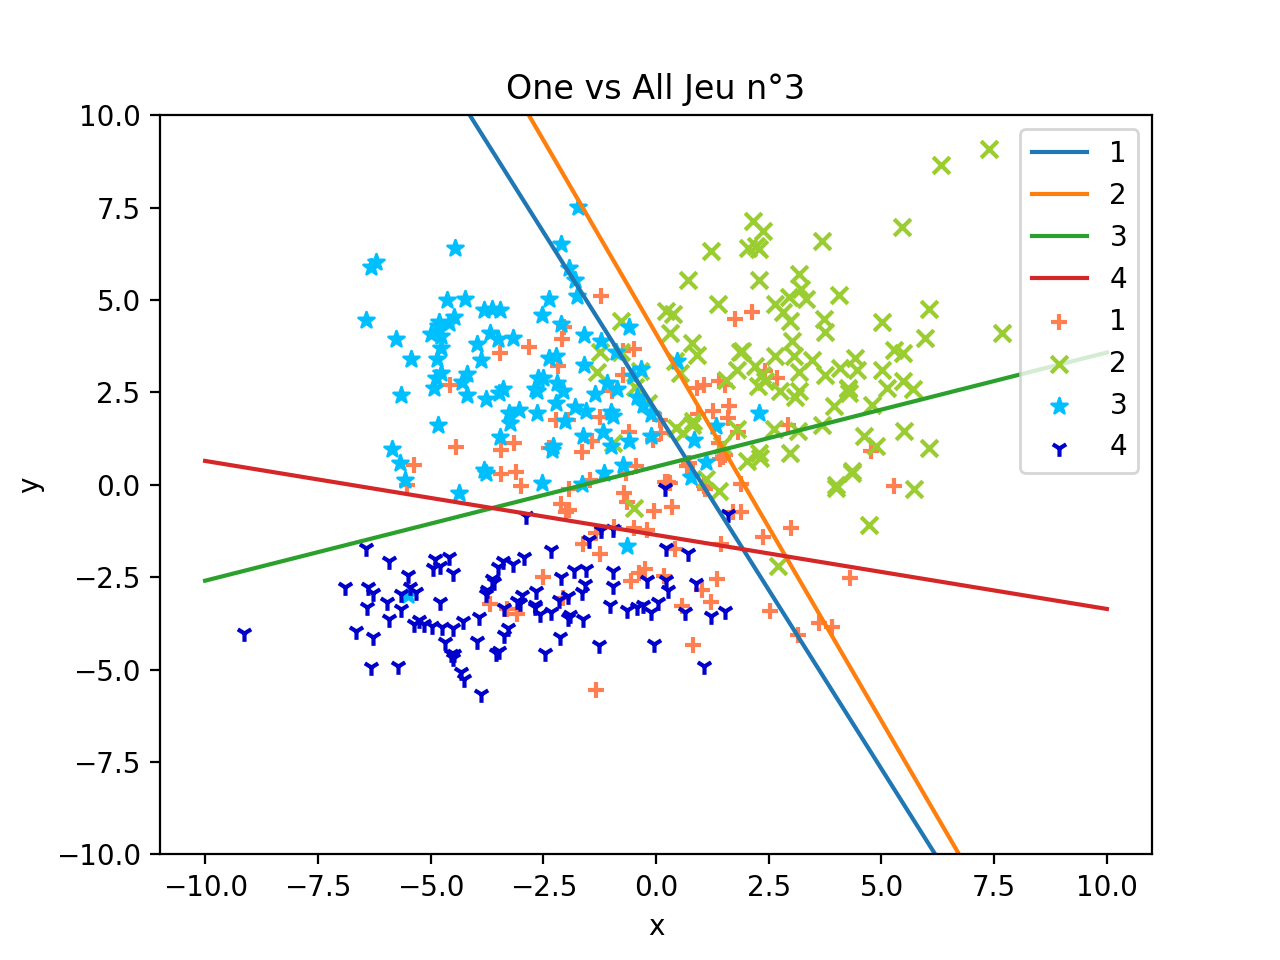

In [27]:
ListeHyper3_OA=separation_lineaire_OneAll_A(df3,a0,7,3)

### Evaluation des performances du modèle pour le jeu n°3

In [28]:
for i in dft3.index:
    pointX=np.zeros((3,1))
    pointX[0,0]=dft3['x'][i]
    pointX[1,0]=dft3['y'][i]
    pointX[2,0]=1
    dft3['ClassifOA'][i]=ClassificationOneAll(pointX,ListeHyper3_OA)

['2.3.4.', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '2', '3', '1.2.3.']
['1', '1.3.4.', '3', '1.2.3.']
['1', '2', '1.2.4.', '1.2.3.']
['2.3.4.', '1.3.4.', '1.2.4.', '1.2.3.']
['2.3.4.', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '1.3.4.', '3', '1.2.3.']
['1', '1.3.4.', '3', '1.2.3.']
['1', '2', '1.2.4.', '1.2.3.']
['2.3.4.', '1.3.4.', '1.2.4.', '4']
['2.3.4.', '1.3.4.', '3', '4']
['2.3.4.', '1.3.4.', '1.2.4.', '4']
['1', '1.3.4.', '3', '1.2.3.']
['1', '1.3.4.', '1.2.4.', '1.2.3.']
['2.3.4.', '1.3.4.', '3', '1.2.3.']
['2.3.4.', '1.3.4.', '1.2.4.', '4']
['2.3.4.', '1.3.4.', '3', '1.2.3.']
['2.3.4.', '1.3.4.', '1.2.4.', '4']
['2.3.4.', '1.3.4.', '1.2.4.', '4']
['2.3.4.', '1.3.4.', '1.2.4.', '4']
['2.3.4.', '1.3.4.', '3', '1.2.3.']
['1', '2', '1.2.4.', '4']
['2.3.4.', '1.3.4.', '3', '1.2.3.']
['1', '2', '3', '1.2.3.']
['2.3.4.', '1.3.4.', '1.2.4.', '1.2.3.']
['1', '2', '3', '1.2.3.']
['1', '2', '3', '1.2.3.']
['2.3.4.', '1.3.4.', '3', '1.2.3.']
['2.3.4.', '1.3.4.', 

In [31]:
dft3

,Classe,x,y,ClassifOO,ClassifOA
0,1,-1.000230,-0.367790,NaN,NaN
1,1,1.571856,-0.982374,NaN,1.0
2,1,-0.280866,5.052934,NaN,NaN
3,1,0.150075,2.122058,NaN,NaN
4,1,2.362957,-0.210292,NaN,NaN
...,...,...,...,...,...
395,4,-0.284623,-1.667501,NaN,4.0
396,4,-2.896904,-0.272980,NaN,3.0
397,4,-2.849717,-1.536192,NaN,4.0
398,4,-1.303726,-4.637186,NaN,4.0


In [29]:
MatriceConfusion_OA(dft3)

array([[ 5.,  0., 20., 25.],
       [ 1.,  0.,  5.,  0.],
       [ 1.,  0., 82.,  2.],
       [ 0.,  0., 16., 73.]])

In [30]:
tauxClassif_OA(dft3)

40.0

### Je remarque que le taux de classification pour le cas One vs one est bcp plus meilleur que celui du cas One vs All.

### La séparation linéaire nous donne de meilleur résultat lorsque le jeu de données est linéairement séparable.